## Linear Regression (Simple Regression)


Kolay bir yöntem, bizim bir fonksiyonumuz var ve bu fonksiyonu tahmin etmeye çalışıyoruz.

**Assumption**: Aradığımız f doğrusal bir fonksiyondur.


Y = f(X) + e ~> # Y_hat = f_hat(x)

Y ~= f_hat(X)

Çıktımız (Y) ve girdimiz (X) bunların arasındaki ilişkinin doğrusal olduğunu düşünüyoruz.

Girdimize ß1(coefficient gibi bir katsayı ile çarpıp ß0(intercept) ekliyoruz.
 



Y = ß_0 + ß_1 * X

house_price = ß_0 + ß1 * X


**Multiple Regression** da olabilirdi, birden fazla değişkene bağlı olabilir çıktımız.

Y ~= ß0 + ß1+ß1X1+ß2X2+.....+ßnXn

house_price = ß0 + ß1*number_of_room + ß2 * location_id + ß3 * square_meters + .... + Bn * feature_n

girdi ve çıktılar skaler.

y_hat = ß0 + ß1 * x

B0 (kesim noktası - intercept) ve B1 (eğim - slope) nasıl bulabiliriz ?

## Training Set

training_set = {(xi, yi) : 1, ..., n}

training_set nedir ? : Bazı x değerleri var ve bunlara karşılık y değerleri var. Eğer biz iyi bir tahmin yapabildiysek doğrusal bir ilişki kabul ederek iyi bir ilişki bulduysak bizim hesapladığımız y_hat lerin gerçek y lere yakın olmasını beklenir.


## Loss
Loss ' u nasıl ölçeriz?

yi ~= B0 + B1 * Xi, i=1,...,n

y_hat_i = (B0 + B1 * Xi)

e_i = (y_i - y_hat_i)              # residual (kalıntı - ith residual)


Bir tanesi için residual bu şekilde fakat bizde bir training_set boyunca hesaplanması gereken residual var.

Hepsi için

RSS = e1^2 + e2^2 + e3^2 ... + en^2

### Residual Sum of Squares

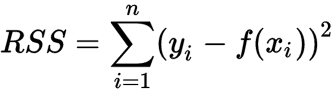

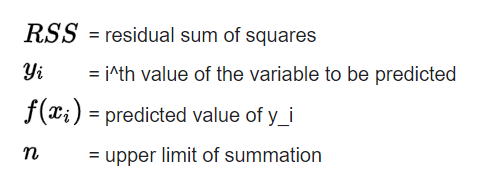

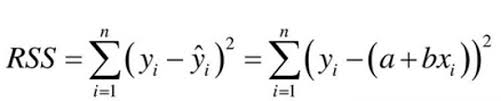

Residuals nasıl görünüyor?
Gerçek verinin bu çizgiye olan uzaklığı ile hatayı ölçüyoruz.



Karelerini alıyoruz (magnitude)

Bu kalıntı karelerden kurtulmak istiyoruz en ideal durumda bütün noktalar bir doğru üzerinde olsaydı bizim beklentimiz olan doğrusal bir ilişkiyi tamamen karşılardı ve modelimiz çok doğru olurdu.

Kalıntı kareleri mümkün olduğunca küçük tutmayı isteyebiliriz.
Yani bu eğitim verisine oturtabileceğimiz (fit) sonsuz sayıda doğru var ancak bir sadece bir tanesini seçmek istiyoruz.

Temel mantık - mümkün olduğunca bütün bu eğitim verisindeki noktalara yakın geçecek, hata paylarını az tutacak bir doğru bulmak.

## Least Squares Method

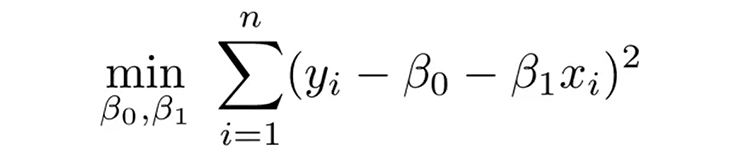

En uygun B0 ve B1 değerini bulacak bir optimizasyon problemi çözüyoruz.
İki bilinmeyeni var be dış bükey bir fn.

Temelde çözeceğim fonksiyonun bir tane minimum noktası olduğunu biliyorsam, tek yapacağım şey verilen fonksiyonun türevini almak b0 ve b1 e göre ve 0 a eşitlemem yetecek.


minimization of LSE khanacademy - https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/proof-part-1-minimizing-squared-error-to-regression-line



In [10]:
#example-1

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv('./data/USA_Housing.csv')

In [3]:
data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
feature=data.drop(['Price','Address'],axis=1).values
target =data['Price'].values

In [6]:
feature

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [7]:
# train test split
train, test, train_label, test_label = train_test_split(feature,target,test_size=0.3,random_state=222)

In [8]:
# model
reg=LinearRegression(fit_intercept=True)

# best fit
model = reg.fit(train,train_label)

# test
predict = model.predict(test)

In [9]:
r"""
r2 score is coefficient of determination
it assesses the goodness-of-fit of a linear regression model, on scale from [0,1]
prediction : proportional reduction in model prediction error
explanation : proportion of variance in response variable explained by explanatory variables

how much variation in y does x explain ?
or
how much does including x reduce our error in prediction y ?
"""

print(r2_score(test_label,predict))

0.9128330751213811


In [ ]:
# example-2

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


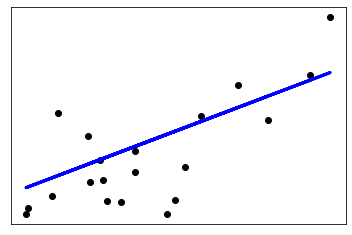

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


# Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model

We will use something called as an Iris dataset, which is a dataset of 3 flowers, but for our problem we will only take 2 classes of them.

In [11]:
iris = datasets.load_iris()

In [12]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

Let us try to plot and see how our data lies. Whether can it be separated using a decision boundary.

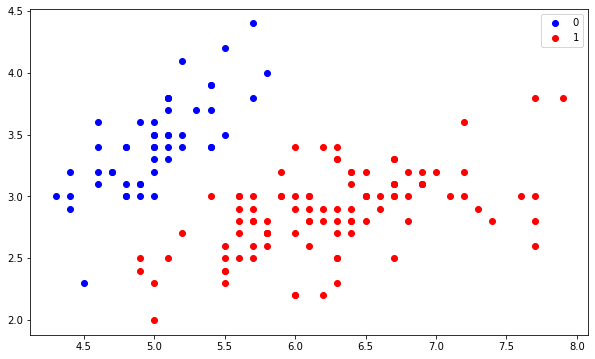

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

It seems that it can be differentiated using a Decision Boundary, now lets define our class

In [21]:
class LogisticRegression:
    
    # defining parameters such as learning rate, number ot iterations, whether to include intercept, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    def __b_intercept(self, X):
        # initially we set it as all 1's
        intercept = np.ones((X.shape[0], 1))
        # then we concatinate them to the value of X, we don't add we just append them at the end.
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid_function(self, z):
        # this is our actual sigmoid function which predicts our yp
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, yp, y):
        # this is the loss function which we use to minimize the error of our model
        # https://machinelearningmastery.com/cross-entropy-for-machine-learning/
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    # this is the function which trains our model.
    def fit(self, X, y):
        
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
        self.W = np.zeros(X.shape[1])
        
        # this for loop runs for the number of iterations provided
        for i in range(self.num_iterations):
            
            # this is our W * Xi
            z = np.dot(X, self.W)
            
            # this is where we predict the values of Y based on W and Xi
            yp = self.__sigmoid_function(z)
            
            # this is where the gradient is calculated form the error generated by our model
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
            self.W -= self.learning_rate * gradient
            
            # this is our new W * Xi
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            # this is where the loss is calculated
            loss = self.__loss(yp, y)
            
            # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # this is where we predict the probability values based on out generated W values out of all those iterations.
    def predict_prob(self, X):
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # this is the final prediction that is generated based on the values learned.
        return self.__sigmoid_function(np.dot(X, self.W))
    
    # this is where we predict the actual values 0 or 1 using round. anything less than 0.5 = 0 or more than 0.5 is 1
    def predict(self, X):
        return self.predict_prob(X).round()

Let us try creating a class of it, we will give Learning rate as 0.1 and number of iterations as 300000

In [15]:
model = LogisticRegression(learning_rate=0.1, num_iterations=100)

Now we will try to train our model.

In [16]:
%%time
model.fit(X, y)

Wall time: 5.01 ms


Lets us see how well our prediction works

In [17]:
preds = model.predict(X)
(preds == y).mean()

0.9533333333333334

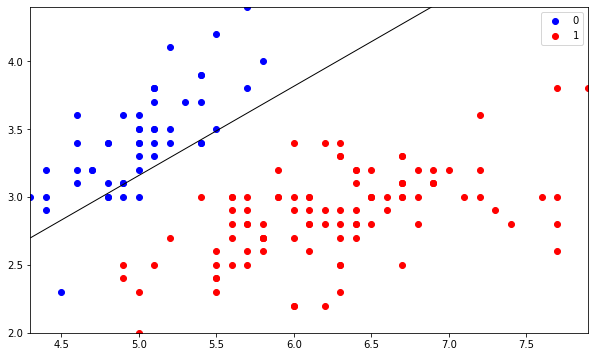

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        50
           1       0.93      1.00      0.97       100

    accuracy                           0.95       150
   macro avg       0.97      0.93      0.95       150
weighted avg       0.96      0.95      0.95       150



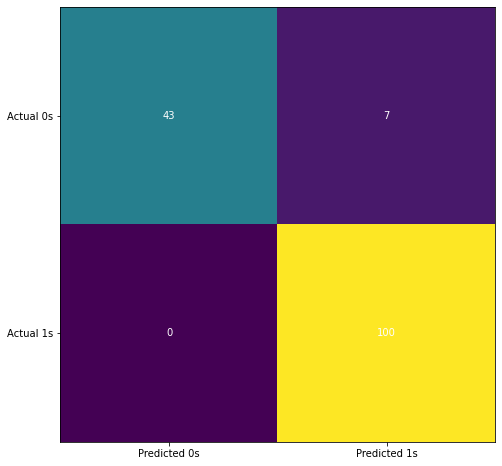

In [20]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

### Implementing Logistic Regression from Scikit-Learn

Either you can choose to do all those coding yourself, or what you can do is just import a class form a phenominal library of python called Scikit-Learn, and use it's pre implemented Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)

### It also has the same method as fit to train the model

In [28]:
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [32]:
preds = model.predict(X)

In [33]:
(preds == y).mean()

0.9933333333333333

In [34]:
model.intercept_, model.coef_

(array([-0.80059233]), array([[ 2.48966566, -3.99890697]]))

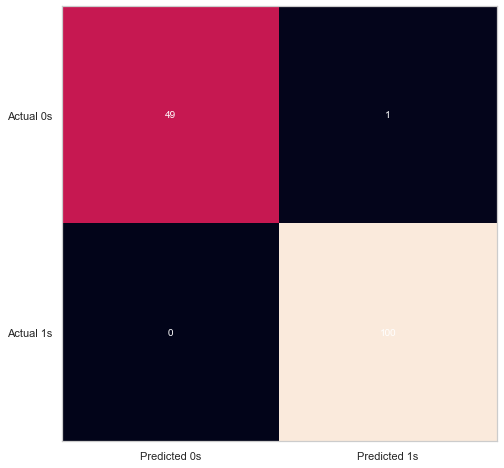

In [30]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [31]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.99      1.00      1.00       100

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

